In [106]:
import xlrd
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

quarters = ["Q1", "Q2", "Q3", "Q4"]

colleges_by_expense = ['UNIVERSITY OF CHICAGO (THE)', \
                           'COLUMBIA UNIVERSITY IN THE CITY OF NEW YORK', \
                           'BARNARD COLLEGE', 'SCRIPPS COLLEGE', \
                           'TRINITY COLLEGE', 'UNIVERSITY OF SOUTHERN CALIFORNIA', \
                           'OBERLIN COLLEGE', 'SOUTHERN METHODIST UNIVERSITY', \
                           'SARAH LAWRENCE COLLEGE', 'DARTMOUTH COLLEGE', \
                           'UNIVERSITY OF PENNSYLVANIA', 'NORTHWESTERN UNIVERSITY', \
                           'AMHERST COLLEGE', 'CLAREMONT MCKENNA COLLEGE', \
                           'HAVERFORD COLLEGE', 'TUFTS UNIVERSITY', \
                           'UNIVERSITY OF TENNESSEE', \
                           'UNIVERSITY OF TENNESSEE - CHATTANOOGA', \
                           'TENNESSEE TECHNOLOGICAL UNIVERSITY']

colleges_by_enrollment = ['TEXAS A&M UNIVERSITY', \
                          'UNIVERSITY OF CENTRAL FLORIDA-MAIN CAMPUS', \
                          'OHIO STATE UNIVERSITY', \
                          'FLORIDA INTERNATIONAL UNIVERSITY', \
                          'UNIVERSITY OF FLORIDA', 'UNIVERSITY OF MINNESOTA', \
                          'UNIVERSITY OF TEXAS - AUSTIN', \
                          'ARIZONA STATE UNIVERSITY', \
                          'GEORGIA STATE UNIVERSITY', \
                          'UNIVERSITY OF SOUTH FLORIDA', \
                          'UNIVERSITY OF TENNESSEE', \
                          'UNIVERSITY OF TENNESSEE - CHATTANOOGA', \
                          'TENNESSEE TECHNOLOGICAL UNIVERSITY']

colleges_by_rank = ['HARVARD UNIVERSITY', 'STANFORD UNIVERSITY', \
                    'MASSACHUSETTS INSTITUTE OF TECHNOLOGY', \
                    'UNIVERSITY OF CALIFORNIA, BERKELEY', \
                    'PRINCETON UNIVERSITY', \
                    'COLUMBIA UNIVERSITY IN THE CITY OF NEW YORK', \
                    'UNIVERSITY OF CHICAGO (THE)', \
                    'YALE UNIVERSITY', 'UNIVERSITY OF PENNSYLVANIA', \
                    'UNIVERSITY OF TENNESSEE', \
                    'UNIVERSITY OF TENNESSEE - CHATTANOOGA', \
                    'TENNESSEE TECHNOLOGICAL UNIVERSITY']

In [107]:
def getData(filename):
    workbook = xlrd.open_workbook(filename)
    worksheet = workbook.sheet_by_index(0)

    data = []
    start_row = 6

    for i in range(start_row, worksheet.nrows):
        school_name = worksheet.cell(i, 1).value
        school_state = worksheet.cell(i, 2).value
        school_type = worksheet.cell(i, 4).value
        school_sub = [worksheet.cell(i, 5).value, worksheet.cell(i, 6).value, worksheet.cell(i, 7).value,\
                      worksheet.cell(i, 8).value, worksheet.cell(i, 9).value]
        school_unsub = [worksheet.cell(i, 10).value, worksheet.cell(i, 11).value,\
                        worksheet.cell(i, 12).value, worksheet.cell(i, 13).value,\
                        worksheet.cell(i, 14).value]
        school_plus = [worksheet.cell(i, 20).value, worksheet.cell(i, 21).value,\
                       worksheet.cell(i, 22).value, worksheet.cell(i, 23).value,\
                       worksheet.cell(i, 24).value]

        row = {}
        row['name'] = school_name
        row['state'] = school_state
        row['type'] = school_type
        row['sub'] = school_sub
        row['unsub'] = school_unsub
        row['plus'] = school_plus
        data.append(row)
    return data

In [108]:
def loan_vs(data, colleges):
    sub_array = []
    unsub_array = []
    plus_array = []
    for x in colleges:        
        tot_sub_rec = 0
        tot_unsub_rec = 0
        tot_plus_rec = 0
        
        tot_sub_dis = 0
        tot_unsub_dis = 0
        tot_plus_dis = 0
        for q in data:
            for row in q:
                if x == row['name']:
                    if row['sub'][4] != '-' and row['sub'][4] != ' -':  
                        tot_sub_rec += row['sub'][0]
                        tot_sub_dis += row['sub'][4]
                    
                    if row['unsub'][4] != '-' and row['unsub'][4] != ' -':  
                        tot_unsub_rec += row['unsub'][0]
                        tot_unsub_dis += row['unsub'][4]
                    
                    if row['plus'][4] != '-' and row['plus'][4] != ' -':
                        tot_plus_rec += row['plus'][0]
                        tot_plus_dis += row['plus'][4]
                    break
        sub_per_rec = tot_sub_dis / tot_sub_rec
        unsub_per_rec = tot_unsub_dis / tot_unsub_rec
        plus_per_rec = tot_plus_dis / tot_plus_rec
        
        sub_array.append(round(sub_per_rec, 2))
        unsub_array.append(round(unsub_per_rec, 2))
        plus_array.append(round(plus_per_rec,2))
        print(x)
        print('Subsidized:', sub_per_rec)
        print('Unsubsidized:', unsub_per_rec)
        print('Plus:', plus_per_rec, '\n')
    return sub_array, unsub_array, plus_array

In [109]:
#Average Loan vs. Cost of School
data = []
for quarter in quarters:
    filename = '../data/06-20/18-19/DL_Dashboard_AY2018_2019_' + quarter + '.xls'
    data.append(getData(filename))

question_data = []    
    
#My first question
print("Loan vs. Cost of College\n")
question_data.append(loan_vs(data, colleges_by_expense))
print(question_data)

#My second question
print("Loan vs. Enrollment of College\n")
question_data.append(loan_vs(data, colleges_by_enrollment))
print(question_data)

#My third question
print("Loan vs. Rank of College\n")
question_data.append(loan_vs(data, colleges_by_rank))
print(question_data)
    

Loan vs. Cost of College

UNIVERSITY OF CHICAGO (THE)
Subsidized: 3499.2140077821014
Unsubsidized: 4740.395256916996
Plus: 29226.661904761906 

COLUMBIA UNIVERSITY IN THE CITY OF NEW YORK
Subsidized: 4232.659475218659
Unsubsidized: 5320.12739965096
Plus: 29310.749262536872 

BARNARD COLLEGE
Subsidized: 4416.373579545455
Unsubsidized: 3162.927536231884
Plus: 28958.761904761905 

SCRIPPS COLLEGE
Subsidized: 4121.780952380952
Unsubsidized: 3532.9504950495048
Plus: 25598.555555555555 

TRINITY COLLEGE
Subsidized: 4165.439716312057
Unsubsidized: 3783.408293460925
Plus: 27847.274647887323 

UNIVERSITY OF SOUTHERN CALIFORNIA
Subsidized: 2493.2722036631726
Unsubsidized: 1656.1026982378855
Plus: 21913.087954939343 

OBERLIN COLLEGE
Subsidized: 4084.9015421115064
Unsubsidized: 3327.1116071428573
Plus: 24284.748251748253 

SOUTHERN METHODIST UNIVERSITY
Subsidized: 4159.686206896552
Unsubsidized: 3266.064894448788
Plus: 24661.812854442345 

SARAH LAWRENCE COLLEGE
Subsidized: 4348.731448763251
Unsu

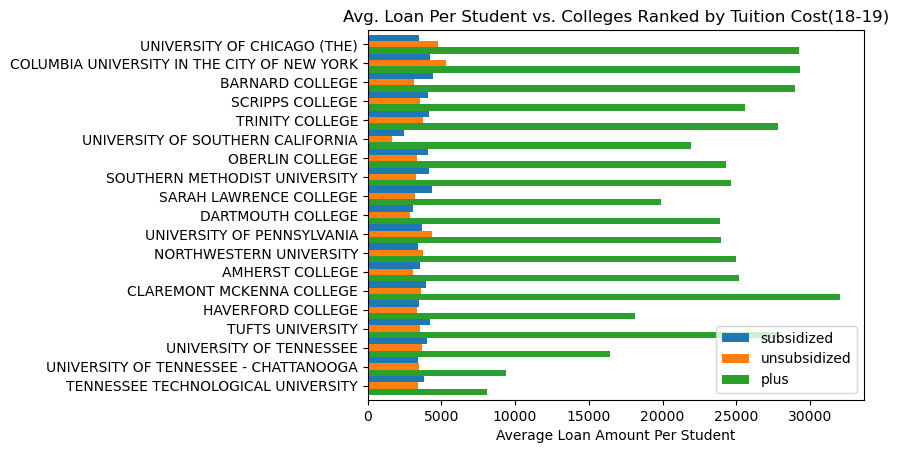

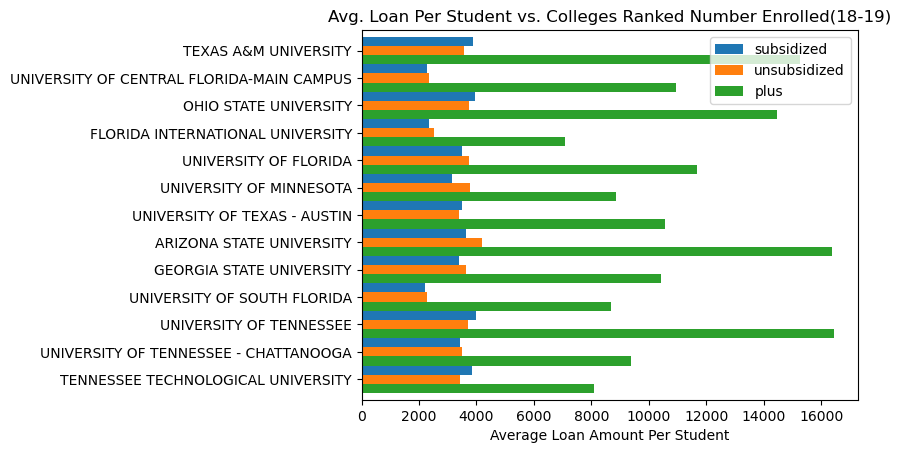

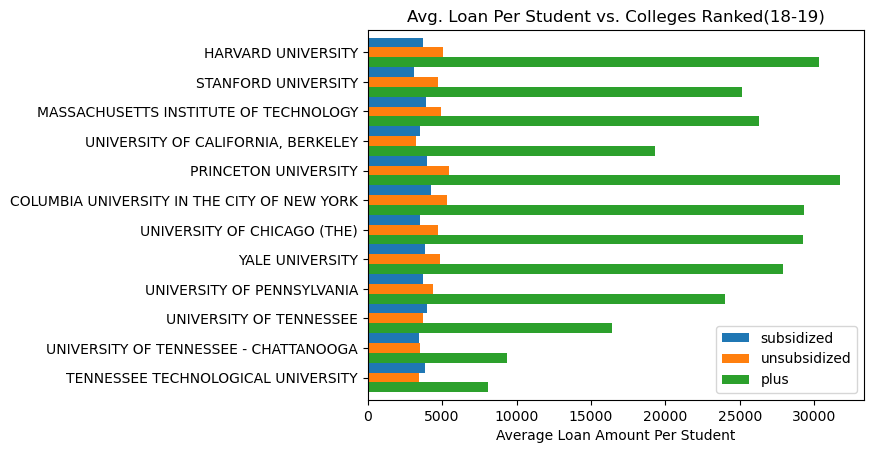

In [110]:
#Plotting Code Q1
ypos = np.arange(len(colleges_by_expense))

df = pd.DataFrame({'subsidized': question_data[0][0], 'unsubsidized': question_data[0][1], 'plus': question_data[0][2]}, \
                   index=colleges_by_expense)
ax = df.plot.barh(width=1, zorder=1)
ax.invert_yaxis()
ax.set_xlabel('Average Loan Amount Per Student')
ax.set_title('Avg. Loan Per Student vs. Colleges Ranked by Tuition Cost(18-19)')

#Plotting Code Q2

ypos = np.arange(len(colleges_by_enrollment))

df = pd.DataFrame({'subsidized': question_data[1][0], 'unsubsidized': question_data[1][1], 'plus': question_data[1][2]}, \
                   index=colleges_by_enrollment)
ax = df.plot.barh(width=1)
ax.invert_yaxis()
ax.set_xlabel('Average Loan Amount Per Student')
ax.set_title('Avg. Loan Per Student vs. Colleges Ranked Number Enrolled(18-19)')

#Plotting Code Q3

ypos = np.arange(len(colleges_by_rank))

df = pd.DataFrame({'subsidized': question_data[2][0], 'unsubsidized': question_data[2][1], 'plus': question_data[2][2]}, \
                   index=colleges_by_rank)
ax = df.plot.barh(width=1)
ax.invert_yaxis()
ax.set_xlabel('Average Loan Amount Per Student')
ax.set_title('Avg. Loan Per Student vs. Colleges Ranked(18-19)')

plt.show()